In [477]:
"""
Created By    : Clay Wooton
Creation Date : 7 December 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.

Through the use of Lorenz's (1984, 1990, 2006) system of ODEs, we performed two 
simulations. Each simulation had a different set of initial conditions. By using 
forward time differencing, we were able to solve this system of equations.

We then looked at how the simulations diverged up to 120 days with a time step of 
four hours.

"""
__author__    = "Clay Wooton"
__contact__   = "claiborne.wooton@und.edu"

In [478]:
#Import Modules

import pandas as pd
import numpy as np                 
import matplotlib.pyplot as plt    
import cartopy.crs as ccrs         
import cartopy.feature as cfeature 

In [479]:
#Constants

a = 0.25  
b = 4.0
F = 8.0
G = 1.0

In [480]:
#Use forward time differencing

def equations(x,y,z):
    dx_dt = -y**2 - z**2 - a*x + a*F
    dy_dt = x*y - b*x*z - y + G
    dz_dt = b*x*y + x*z - z
    xdelt = x + time_step * (dx_dt)
    ydelt = y + time_step * (dy_dt)
    zdelt = z + time_step * (dz_dt)
    return (xdelt, ydelt, zdelt)

time_step = 4/(24*5)   #Normalized time step
real_time = 120/5      #Normalized run time
times = np.arange(0,real_time,time_step)

In [481]:
#Initial Conditions

#First simulation
x0_1 = 2.5
y0_1 = 1.0
z0_1 = 0

#Second simulation
x0_2 = 2.49
y0_2 = 1.0
z0_2 = 0

In [482]:
#Run simulations

#First simulation/intitial conditions
(x,y,z) = (x0_1, y0_1, z0_1)
sim_1 = np.zeros((len(times),3))

for i in range(len(times)):
    (x,y,z) = equations(x,y,z)
    sim_1[i] = (x,y,z)

#Second simulation/initial conditions    
(x,y,z) = (x0_2, y0_2, z0_2)
sim_2 = np.zeros((len(times),3))

for i in range(len(times)):
    (x,y,z) = equations(x,y,z)
    sim_2[i] = (x,y,z)

In [483]:
#Transpose simulations from 720x3 to 3x720

sim_1 = sim_1.T
sim_2 = sim_2.T

#First simulation w.r.t. x,y,z, respectively
sim_1x = sim_1[0]
sim_1y = sim_1[1]
sim_1z = sim_1[2]

#Second simulation w.r.t x,y,z, respectively
sim_2x = sim_2[0]
sim_2y = sim_2[1]
sim_2z = sim_2[2]

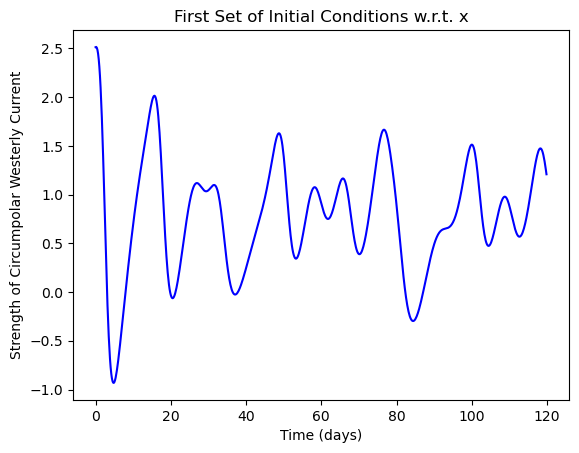

In [484]:
#Plot first simulation with respect to x

plt.plot(times*5, sim_1x, color = 'b')
plt.xlabel("Time (days)")
plt.ylabel("Strength of Circumpolar Westerly Current")
plt.title("First Set of Initial Conditions w.r.t. x")
plt.savefig("sim_1x")

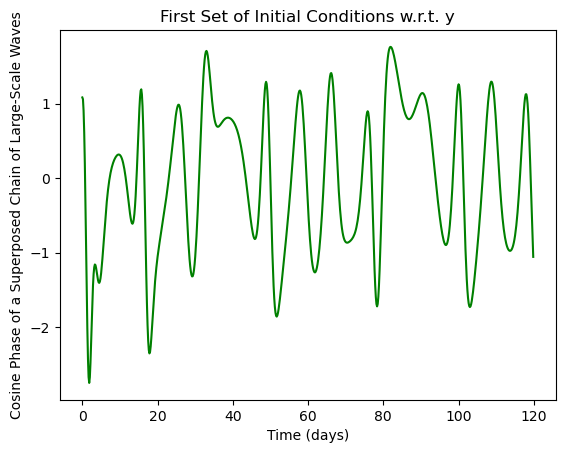

In [485]:
#Plot first simulation with respect to y

plt.plot(times*5, sim_1y, color = 'g')
plt.xlabel("Time (days)")
plt.ylabel("Cosine Phase of a Superposed Chain of Large-Scale Waves")
plt.title("First Set of Initial Conditions w.r.t. y")
plt.savefig("sim_1y")

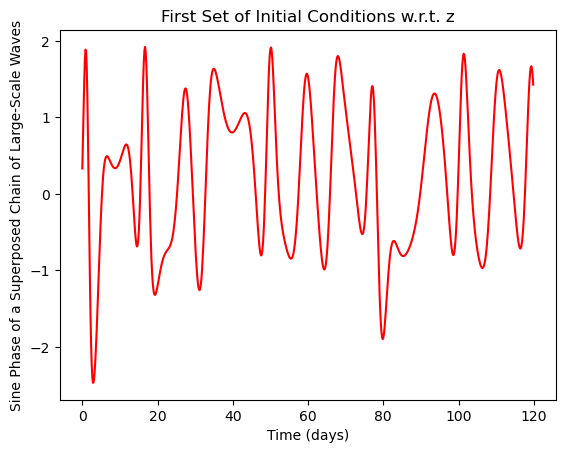

In [486]:
#Plot first simulation with respect to z

plt.plot(times*5, sim_1z, color = 'r')
plt.xlabel("Time (days)")
plt.ylabel("Sine Phase of a Superposed Chain of Large-Scale Waves")
plt.title("First Set of Initial Conditions w.r.t. z")
plt.savefig("sim_1z")

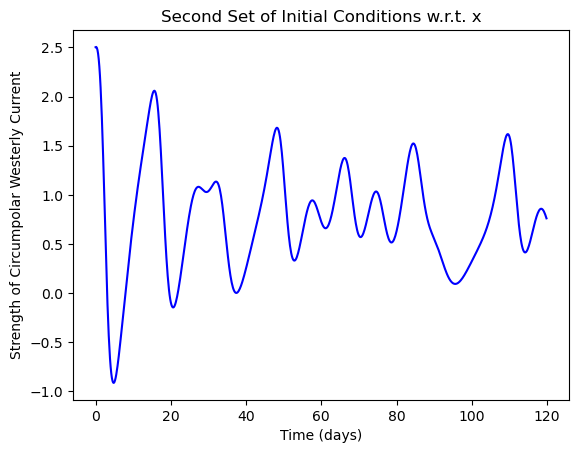

In [487]:
#Plot second simulation with respect to x

plt.plot(times*5, sim_2x, color = 'b')
plt.xlabel("Time (days)")
plt.ylabel("Strength of Circumpolar Westerly Current")
plt.title("Second Set of Initial Conditions w.r.t. x")
plt.savefig("sim_2x")

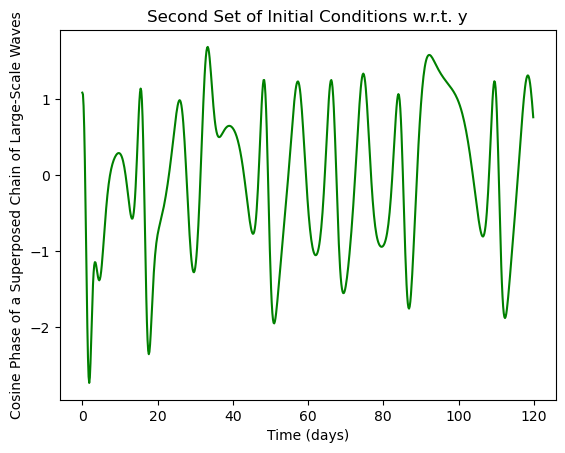

In [488]:
#Plot second simulation with respect to y

plt.plot(times*5, sim_2y, color = 'g')
plt.xlabel("Time (days)")
plt.ylabel("Cosine Phase of a Superposed Chain of Large-Scale Waves")
plt.title("Second Set of Initial Conditions w.r.t. y")
plt.savefig("sim_2y")

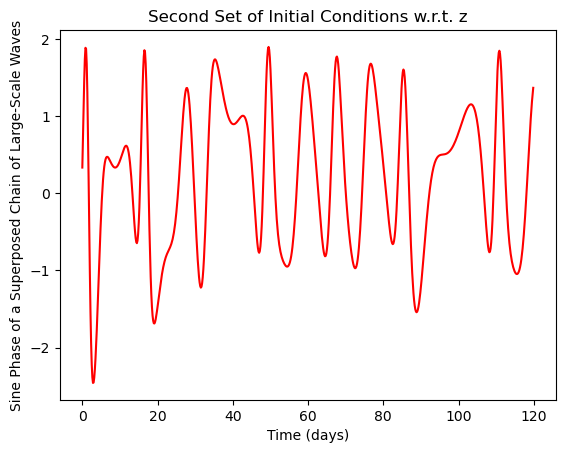

In [489]:
#Plot second simulation with respect to z

plt.plot(times*5, sim_2z, color = 'r')
plt.xlabel("Time (days)")
plt.ylabel("Sine Phase of a Superposed Chain of Large-Scale Waves")
plt.title("Second Set of Initial Conditions w.r.t. z")
plt.savefig("sim_2z")

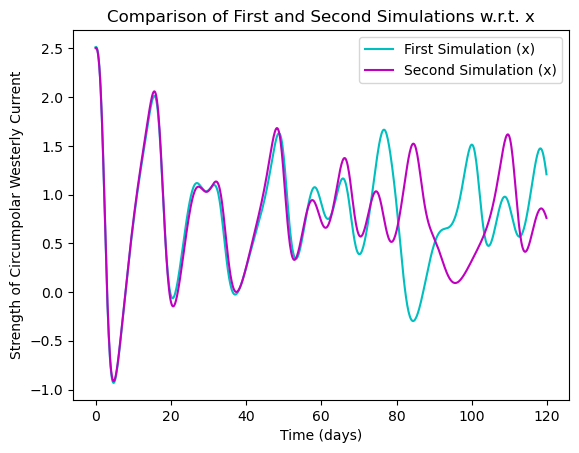

In [490]:
#Plot first set of initial conditions against second set of initial conditions w.r.t x

plt.plot(times*5, sim_1x, color = "c", label= "First Simulation (x)")
plt.plot(times*5, sim_2x, color = "m", label= 'Second Simulation (x)')
plt.xlabel("Time (days)")
plt.ylabel("Strength of Circumpolar Westerly Current")
plt.title("Comparison of First and Second Simulations w.r.t. x")
plt.legend()
plt.savefig("sim_1xv2x")

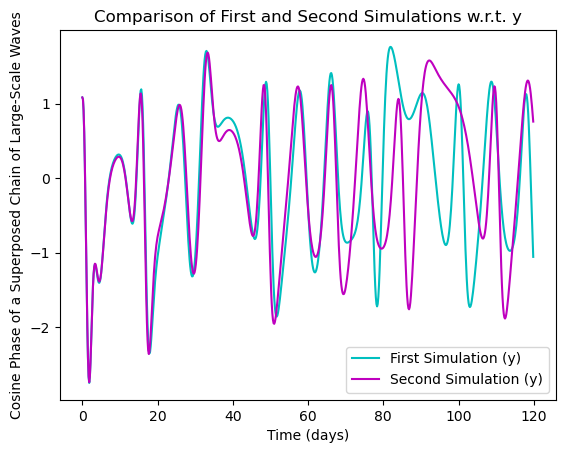

In [491]:
#Plot first set of initial conditions against second set of initial conditions w.r.t y

plt.plot(times*5, sim_1y, color = "c", label= "First Simulation (y)")
plt.plot(times*5, sim_2y, color = "m", label= 'Second Simulation (y)')
plt.xlabel("Time (days)")
plt.ylabel("Cosine Phase of a Superposed Chain of Large-Scale Waves")
plt.title("Comparison of First and Second Simulations w.r.t. y")
plt.legend()
plt.savefig("sim_1yv2y")

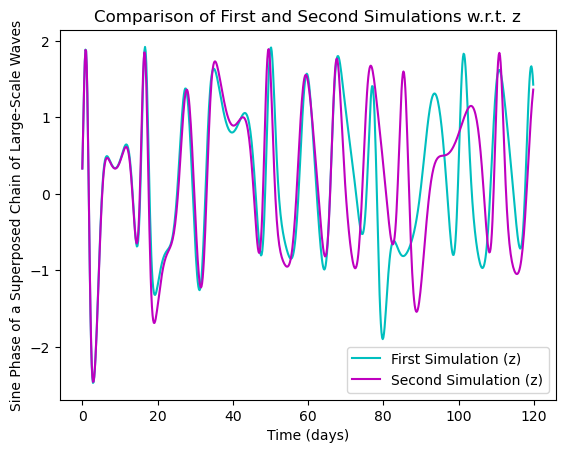

In [492]:
#Plot first set of initial conditions against second set of initial conditions w.r.t z

plt.plot(times*5, sim_1z, color = "c", label= "First Simulation (z)")
plt.plot(times*5, sim_2z, color = "m", label= 'Second Simulation (z)')
plt.xlabel("Time (days)")
plt.ylabel("Sine Phase of a Superposed Chain of Large-Scale Waves")
plt.title("Comparison of First and Second Simulations w.r.t. z")
plt.legend()
plt.savefig("sim_1zv2z")